<h1><center><br>Binary Classification with Logistic Regression<br></center></h1>

# Overview

In this project, you are going to implement logistic regression from scratch. You are provided
a subset of the famous handwritten digit dataset called MNIST. In the subset, you will find images of digit 1 and 5. Therefore, you will be solving a binary classification problem. The project includes feature extraction, model training, and evaluation steps.

First, you will load and visualize the data portion we have provided to you and then extract two different set of features to build a classifier on. When you extracted the desired features, you will run your logistic regression implementation with gradient descent on the representations to classify digits into 1 and 5. You will experiment with different learning rates  and regularization parameter ($\lambda$) and find the optimal $\lambda$ with 5-fold cross validation. Finally, you will evaluate the implemented models, decide which is the best performing one and visualize a decision boundary.

Follow the steps on this notebook that would guide you through the solution step-by-step. Make sure that the notebook reports your work properly and add comments and opinions when necessary.

**IMPORTANT NOTE:** You are allowed to use third-party libraries such as `numpy` and `matplotlib` to help you implement necessary procedures. However, you should not import any function that accomplishes the task itself. For instance, you can use `numpy` arrays for matrix operations, but you cannot use `scikit-learn` to implement cross validation.

## Task 1: Feature Extraction (35 Pts)

Load the training/test data and labels as numpy arrays (Hint:`np.load`). Train and test data are 1561x256 and 424x256 dimensional matrices, respectively. Each row in the
aforementioned matrices corresponds to an image of a digit. The 256 pixels correspond to a 16x16 image. Label 1 is assigned to digit 1 and label -1 is assigned to digit 5.

In [11]:
# First, we need to import numpy and matplotlib


import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

    
# we take train data from data folder
DigitData_Train=np.load("C:\\Users\\musat\\Desktop\\data\\train_data.npy")

DigitData_Train_Label=np.load("C:\\Users\\musat\\Desktop\\data\\train_labels.npy")

# we take test data from data folder

DigitData_Test=np.load("C:\\Users\\musat\\Desktop\\data\\test_data.npy")

DigitData_Test_Label=np.load("C:\\Users\\musat\\Desktop\\data\\test_labels.npy")


**(5 points)** Display two of the digit images, one for digit 1 and one for digit 5. You can use `imshow` function of `matplotlib` library with a suitable colormap. You will first need to reshape 256 pixels to a 16x16 matrix. 

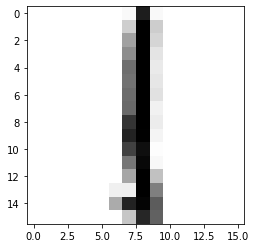

In [12]:
# I take the first row of train data,it's dimension is 1x256, then reshape it into 16x16 matrix and plot with imshow

digit1=np.reshape(DigitData_Train[1,], (16, 16))
display(plt.imshow(digit1, cmap=plt.cm.Greys))




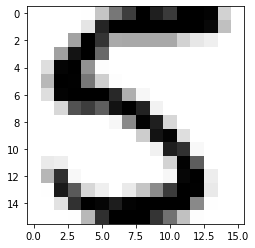

In [13]:
#the same process for digit 5
digit5=np.reshape(DigitData_Train[1300,], (16, 16))
display(plt.imshow(digit5, cmap=plt.cm.Greys))


**(10 points) Implementing Representation 1:** Extract the **symmetry** and **average intensity** features discussed in the class (see logistic regression lecture notes). To compute the intensity features, compute the average pixel value of the image, and for the symmetry feature, compute the negative of the norm of the difference between the image and its y-axis symmetrical. Search numpy's documentation to find the suitable function at each step. You should extract these two features for each image in the training and test sets. As a result, you should obtain a training data matrix of size 1561x2 and test data matrix of size 424x2.

Throughout the notebook, we will refer the representation with these two features as **Representation 1** 

In [14]:
# now we will create 1561x2 and 424x2 arrays, I will first compute average intensity and assing it into column 0
array_train =np.empty([1561,2])
array_test  =np.empty([424,2])

################ average intensity part #####


# for this step I will convert all rows into 16x16 image
images_Train=np.empty([16,16])
images_Test=np.empty([16,16])
for i in range(1561):  # range is from 0 to 1561 so we have 1561 elements 
    images_Train=np.reshape(DigitData_Train[i,], (16, 16))
    array_train[i,0]=np.mean(images_Train)  # we take the average of pixels here
    
for j in range(424):# repeat process for test data,0 to 423; 424 elements
    images_Test=np.reshape(DigitData_Test[j,], (16, 16))
    array_test[j,0]=np.mean(images_Test)



################ symmetry part ######



### train data ###
for k in range(1561):
    digit=np.reshape(DigitData_Train[k,], (16, 16))  # we have vector 1x256, we turn it to image with 16x16 matrix 
    digit_yaxis=digit.copy()   # we copy the image and take axis symmetry in order to save previous image

    for i in range(8):  #range is half of the dimension of matrix because we pair them and change 
        for j in range(16): # this is the y symmetry algorithm
            temp=digit_yaxis[j,i]
            digit_yaxis[j,i]=digit_yaxis[j,15-i]
            digit_yaxis[j,15-i]=temp

    array_train[k,1]=LA.norm(-1*np.absolute(digit-digit_yaxis),'fro') #here we use lA from nupmy library we find frobenius norm
    
#### test data ###

# same explanations above 
for k in range(424):
    digit=np.reshape(DigitData_Test[k,], (16, 16))
    digit_yaxis=digit.copy()

    for i in range(8):
        for j in range(16):
            temp=digit_yaxis[j,i]
            digit_yaxis[j,i]=digit_yaxis[j,15-i]
            digit_yaxis[j,15-i]=temp

    array_test[k,1]=LA.norm(-1*np.absolute(digit-digit_yaxis),'fro')
    
    

    
    

**(5 points)** Provide two scatter plots, one for training and one for test data. The plots should contain the average intensity values in the x-axis and symmetry values in the
y-axis. Denote the data points of label 1 with blue marker shaped <font color='blue'>o</font> and the data points of label -1 with a red marker shaped <font color='red'>x</font>. (Hint: check out `plt.scatter` and its `marker` and `color` parameters). Explicitly state the axis labels and figure title for both plots (Hint: `plt.xlabel`, `plt.ylabel`, `plt.title`). 

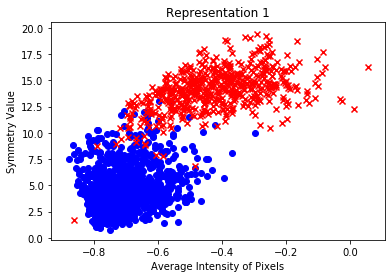

In [15]:
# I create array with label also includes feature 1 and 2
array_train_label=np.empty([1561,3])

#now assign the columns into this new 3D array
array_train_label[:,0]=array_train[:,0]
array_train_label[:,1]=array_train[:,1]
array_train_label[:,2]=DigitData_Train_Label

#in order to make seperate markers we have to divide set into two
subset1_train=array_train_label[array_train_label[:,2]==1]
subset2_train=array_train_label[array_train_label[:,2]==-1]

#we now use scatter to plot data
plt.scatter(subset1_train[:,0], subset1_train[:,1],marker='o',color='blue')
plt.scatter(subset2_train[:,0], subset2_train[:,1],marker='x',color='red')
plt.title('Representation 1')
plt.xlabel('Average Intensity of Pixels')
plt.ylabel('Symmetry Value')
y=array_train[:,1]
x=array_train[:,0]

#plt.plot(x, -23.4*x -4.03,color='green')



Text(0, 0.5, 'Symmetry Value')

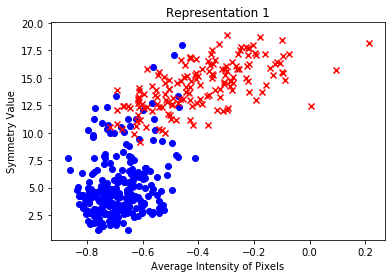

In [16]:
# I create array with label also includes feature 1 and 2,this time for test data
array_test_label=np.empty([424,3])

#now assign the columns into this new 3D array
array_test_label[:,0]=array_test[:,0]
array_test_label[:,1]=array_test[:,1]
array_test_label[:,2]=DigitData_Test_Label

#in order to make seperate markers we have to divide set into two
subset1_test=array_test_label[array_test_label[:,2]==1]
subset2_test=array_test_label[array_test_label[:,2]==-1]

#we now use scatter to plot data
plt.scatter(subset1_test[:,0], subset1_test[:,1],marker='o',color='blue')
plt.scatter(subset2_test[:,0], subset2_test[:,1],marker='x',color='red')
plt.title('Representation 1')
plt.xlabel('Average Intensity of Pixels')
plt.ylabel('Symmetry Value')

**(15 points) Implementing Representation 2:** Come up with an alternative feature extraction approach. The features can again be 2-D, or higher dimensional. If you use any external resource, please cite the references. Explain the feature extraction procedure clearly in your report; if it is an algorithm, provide the algorithm; if it is a function, provide the mathematical expressions. 

If your proposed features are 2-D or 3-D, provide the scatter plots similar to the previous step.

We will refer this representation proposed by you as **Representation 2**.

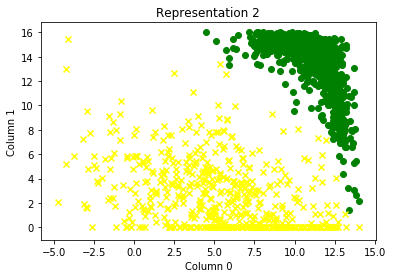

In [17]:
features_R2_2D=np.zeros([1561,2])
for k in range(1561):
    
        
    images_Train=np.reshape(DigitData_Train[k,], (16, 16))
    sum=0
    for i in range(16):
        for j in range(16):
            if(i==j):
                sum+=images_Train[i,j]
    features_R2_2D[k,0]=-sum

    
for k in range(1561):
    
        
    images_Train=np.reshape(DigitData_Train[k,], (16, 16))
    sum2=0
    max=0
    for i in range(16):
        sum2=0
        for j in range(16):
            sum2+=images_Train[j,i]
        if(sum2>max):
                max=sum2
    
    
    features_R2_2D[k,1]=max
    
R2_representation_with_label=np.zeros([1561,3])
R2_representation_with_label[:,0]=features_R2_2D[:,0]
R2_representation_with_label[:,1]=features_R2_2D[:,1]
R2_representation_with_label[:,2]=DigitData_Train_Label


subset1_R2=R2_representation_with_label[R2_representation_with_label[:,2]==1]
subset2_R2=R2_representation_with_label[R2_representation_with_label[:,2]==-1]


#we now use scatter to plot data
plt.scatter(subset1_R2[:,0], subset1_R2[:,1],marker='o',color='green')
plt.scatter(subset2_R2[:,0], subset2_R2[:,1],marker='x',color='yellow')
plt.title('Representation 2')
plt.xlabel('Column 0')
plt.ylabel('Column 1')
y=features_R2_2D[:,1]
x=features_R2_2D[:,0]


Text(0, 0.5, 'Column 1')

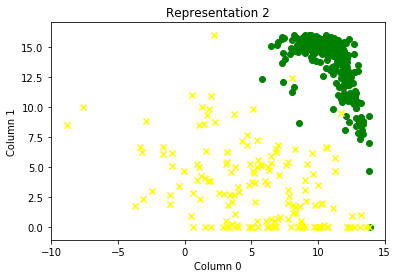

In [18]:
features_R2_2D_test=np.zeros([424,2])
for k in range(424):
    
        
    images_Train=np.reshape(DigitData_Test[k,], (16, 16))
    sum=0
    for i in range(16):
        for j in range(16):
            if(i==j):
                sum+=images_Train[i,j]
    features_R2_2D_test[k,0]=-sum

    
for k in range(424):
    
        
    images_Train=np.reshape(DigitData_Test[k,], (16, 16))
    sum2=0
    max=0
    for i in range(16):
        sum2=0
        for j in range(16):
            sum2+=images_Train[j,i]
        if(sum2>max):
                max=sum2  
    
    
    features_R2_2D_test[k,1]=max
    
    
    
R2_representation_with_label_test=np.zeros([424,3])
R2_representation_with_label_test[:,0]=features_R2_2D_test[:,0]
R2_representation_with_label_test[:,1]=features_R2_2D_test[:,1]
R2_representation_with_label_test[:,2]=DigitData_Test_Label


subset1_R2_test=R2_representation_with_label_test[R2_representation_with_label_test[:,2]==1]
subset2_R2_test=R2_representation_with_label_test[R2_representation_with_label_test[:,2]==-1]


#we now use scatter to plot data
plt.scatter(subset1_R2_test[:,0], subset1_R2_test[:,1],marker='o',color='green')
plt.scatter(subset2_R2_test[:,0], subset2_R2_test[:,1],marker='x',color='yellow')
plt.title('Representation 2')
plt.xlabel('Column 0')
plt.ylabel('Column 1')
    
    
    
    
    
    
    


## Task 2: Logistic Regression (40 Pts)

**(20 points)** Implement the logistic regression classifier from scratch with gradient descent and train it using Representation 1 and Representation 2 as inputs. Concatenate
1 to your features for the intercept term, such that one data point will look like for 2-D features [1,$x_1$,$x_2$], and the model vector will be [$w_0, w_1, w_2$], where $w_0$ is the intercept parameter. 
You can refer to lecture notes (Logistic regression slides 29-30) to review the gradient descent learning algorithm and the logistic loss. To implement the gradient of the logistic loss with respect to $w$, first derive its expression by hand. Please include your derivation in your report.

To prove that your implementation is converging, keep the loss values at each gradient descent iteration in a numpy array. After the training is finalized, plot the loss values
with respect to iteration count (Hint: `plt.plot`). You should observe a decreasing loss as the number of iterations increases. Also, experiment with 5 different learning rates between 0 and 1, and plot the convergence curves for each learning rate in the same plot to observe the effect of the learning rate (step size) on the convergence. 

To decide when to terminate the gradient descent iterations, check the absolute difference between the current loss value and the loss value of the previous step. If the difference is less than a small number, such as $10^{-5}$, you can exit the loop.

In [19]:

a=np.ones([1561,1])
array_train_3d=np.concatenate((a,array_train),axis=1)
u=np.ones([424,1])
array_test_3d=np.concatenate((u,array_test),axis=1)

b=np.ones([1561,1])
array_train_3d_R2=np.concatenate((b,features_R2_2D),axis=1)
c=np.ones([424,1])
array_test_3d_R2=np.concatenate((c,features_R2_2D_test),axis=1)


from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')




def func_gradient(data,label,W,N,alfa,lamda):
    cost_ar=[]
    w=np.zeros([3,1])
    w[0]=W[0]
    w[1]=W[1]
    w[2]=W[2]
 
    cost=0
    size=N
    while(True):

        newcost=cost
        cost=0
        for n in range(N):
            Yn=label[n]
            Xn=data[n,:]
            matrix_mult=np.dot(Xn,w) 
            b=np.log(1+np.exp(-1*Yn*matrix_mult))
            cost=cost+b


        cost+=lamda*(w[1]*w[1]+w[2]*w[2])
        cost/=N
        if (np.absolute(newcost-cost)<0.001):
            break;

        cost_ar.extend(cost)

        gt0=0
        gt1=0
        gt2=0
        for g in range(size):
            Yn=label[g]    
            Xn=data[g,:]
            matrix_mult=np.dot(Xn,w) 
            fa=np.exp(-1*Yn*matrix_mult)
            fb=(-1*Yn)*((fa)/(1+fa))
            gt0+= fb
            gt1+= fb*Xn[1]
            gt2+= fb*Xn[2]


        gt1+=lamda*w[1]*2
        gt2+=lamda*w[2]*2
        gt0/=N
        gt1/=N
        gt2/=N

        w[0]-= (alfa*gt0)
        w[1]-= (alfa*gt1)
        w[2]-= (alfa*gt2)



    return cost_ar,w;


def func_success(data,label,size,w):
    d=0
    c=np.zeros([size,1])
    for i in range(size):

        b=np.dot(data[i,:],w)
        c[i]=1/(1+np.exp(-b))
        if(c[i]>=0.5):
            c[i]=1
        else:
            c[i]=-1
    for i in range(size):

        if((label[i]-c[i])!=0):
                d=d+1

    return ((size-d)/size)*100
  

    


<Figure size 800x400 with 0 Axes>

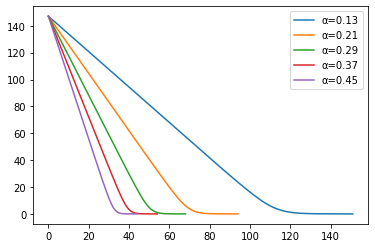

In [21]:

data,label,N=array_train_3d,DigitData_Train_Label,1561
W0=np.zeros([3,1])
W0[0]=-10
W0[1]=-30
W0[2]=-50
cost_array1,w1=func_gradient(data,label,W0,N,0.13,lamda=0)
cost_array2,w2=func_gradient(data,label,W0,N,0.21,lamda=0)
cost_array3,w3=func_gradient(data,label,W0,N,0.29,lamda=0)
cost_array4,w4=func_gradient(data,label,W0,N,0.37,lamda=0)
cost_array5,w5=func_gradient(data,label,W0,N,0.45,lamda=0)

plt.plot(cost_array1,label='α=0.13')
plt.plot(cost_array2,label='α=0.21')
plt.plot(cost_array3,label='α=0.29')
plt.plot(cost_array4,label='α=0.37')
plt.plot(cost_array5,label='α=0.45')
plt.legend()



**(10 points)** Implement logistic regression with $\ell_2$ norm regularization, $||\mathbf{w}||_{2}^{2}$ . Show that your implementation is working by visualizing the loss over the iterations again. Visualization for a single learning rate and $\lambda$ suffices. 

[[ -0.48313778]
 [-36.47226881]
 [ -2.1586309 ]]


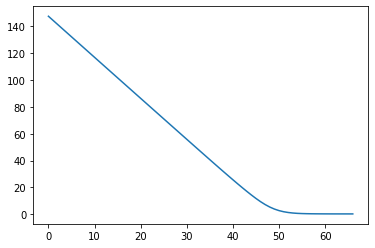

In [22]:
cost_array,w=func_gradient(data,label,W0,N,alfa=0.3,lamda=0.2)
plt.plot(cost_array)
print(w)

**(10 points)** Implement a 5-fold cross validation procedure to find the optimal $\lambda$ value for both Representation 1 and 2. Experiment with at least three different $\lambda$ values between 0 and 1. Report the mean/std of cross validation accuracy of every representation/parameter combination as a table and clearly mark the best configuration in your report. 

In [12]:
#cross validation part I will divide training set into five and use one of them as e test
#size of one cross is 312= 1561/5

cv1_test=array_train_3d[0:312,:]
cv1_test_label=DigitData_Train_Label[0:312]
cv1_train=array_train_3d[312:1561,:]
cv1_train_label=DigitData_Train_Label[312:1561]

cv2_test=array_train_3d[312:624,:]
cv2_test_label=DigitData_Train_Label[312:624]
cv2_train=np.concatenate((array_train_3d[0:312,:],array_train_3d[624:1561,:]),axis=0)
cv2_train_label=np.concatenate((DigitData_Train_Label[0:312],DigitData_Train_Label[624:1561]),axis=0)

cv3_test=array_train_3d[624:936,:]
cv3_test_label=DigitData_Train_Label[624:936]
cv3_train=np.concatenate((array_train_3d[0:624,:],array_train_3d[936:1561,:]),axis=0)
cv3_train_label=np.concatenate((DigitData_Train_Label[0:624],DigitData_Train_Label[936:1561]),axis=0)

cv4_test=array_train_3d[936:1248,:]
cv4_test_label=DigitData_Train_Label[936:1248]
cv4_train=np.concatenate((array_train_3d[0:936,:],array_train_3d[1248:1561,:]),axis=0)
cv4_train_label=np.concatenate((DigitData_Train_Label[0:936],DigitData_Train_Label[1248:1561]),axis=0)

cv5_test=array_train_3d[1248:1561,:]
cv5_test_label=DigitData_Train_Label[1248:1561]
cv5_train=array_train_3d[0:1248,:]
cv5_train_label=DigitData_Train_Label[0:1248]

# cross validation for R2, labels are the same so no need to arrange them again

cv1_test_R2=array_train_3d_R2[0:312,:]
cv1_train_R2=array_train_3d_R2[312:1561,:]

cv2_test_R2=array_train_3d_R2[312:624,:]
cv2_train_R2=np.concatenate((array_train_3d_R2[0:312,:],array_train_3d_R2[624:1561,:]),axis=0)

cv3_test_R2=array_train_3d_R2[624:936,:]
cv3_train_R2=np.concatenate((array_train_3d_R2[0:624,:],array_train_3d_R2[936:1561,:]),axis=0)

cv4_test_R2=array_train_3d_R2[936:1248,:]
cv4_train_R2=np.concatenate((array_train_3d_R2[0:936,:],array_train_3d_R2[1248:1561,:]),axis=0)

cv5_test_R2=array_train_3d_R2[1248:1561,:]
cv5_train_R2=array_train_3d_R2[0:1248,:]

    





In [13]:
W0=np.zeros([3,1])


def cross_validation_R1(lamda):
    W0[0]=-10
    W0[1]=-30
    W0[2]=-50
    accuracy=0
    
    cost_array1,w1=func_gradient(cv1_train,cv1_train_label,W0,1248,0.1,lamda)
    accuracy+=func_success(cv1_test,cv1_test_label,312,w1)

    cost_array2,w2=func_gradient(cv2_train,cv2_train_label,W0,1248,0.1,lamda)
    accuracy+=func_success(cv2_test,cv2_test_label,312,w2)

    cost_array3,w3=func_gradient(cv3_train,cv3_train_label,W0,1248,0.1,lamda)
    accuracy+=func_success(cv3_test,cv3_test_label,312,w3)

    cost_array4,w4=func_gradient(cv4_train,cv4_train_label,W0,1248,0.1,lamda)
    accuracy+=func_success(cv4_test,cv4_test_label,312,w4)

    cost_array5,w5=func_gradient(cv5_train,cv5_train_label,W0,1248,0.1,lamda)
    accuracy+=func_success(cv5_test,cv5_test_label,312,w5)
    
    print("average accuracy is ",accuracy/5,"for lamda=",lamda,"in R1")
    
def cross_validation_R2(lamda):
    W0[0]=-10
    W0[1]=-10
    W0[2]=-10
    accuracy=0
    
    cost_array1,w1=func_gradient(cv1_train_R2,cv1_train_label,W0,1248,0.1,lamda)
    accuracy+=func_success(cv1_test_R2,cv1_test_label,312,w1)

    cost_array2,w2=func_gradient(cv2_train_R2,cv2_train_label,W0,1248,0.1,lamda)
    accuracy+=func_success(cv2_test_R2,cv2_test_label,312,w2)

    cost_array3,w3=func_gradient(cv3_train_R2,cv3_train_label,W0,1248,0.1,lamda)
    accuracy+=func_success(cv3_test_R2,cv3_test_label,312,w3)

    cost_array4,w4=func_gradient(cv4_train_R2,cv4_train_label,W0,1248,0.1,lamda)
    accuracy+=func_success(cv4_test_R2,cv4_test_label,312,w4)

    cost_array5,w5=func_gradient(cv5_train_R2,cv5_train_label,W0,1248,0.1,lamda)
    accuracy+=func_success(cv5_test_R2,cv5_test_label,312,w5)
    
    print("averege accuracy is ",accuracy/5,"for lamda=",lamda,"in R2")

    
cross_validation_R1(0.1)
cross_validation_R1(0.4)
cross_validation_R1(0.9)

cross_validation_R2(0.1)
cross_validation_R2(0.4)
cross_validation_R2(0.8)

average accuracy is  96.53846153846155 for lamda= 0.1 in R1
average accuracy is  96.53846153846155 for lamda= 0.4 in R1
average accuracy is  96.60256410256412 for lamda= 0.9 in R1
averege accuracy is  97.24358974358975 for lamda= 0.1 in R2
averege accuracy is  97.24358974358975 for lamda= 0.4 in R2
averege accuracy is  97.24358974358975 for lamda= 0.8 in R2


## Task 3: Evaluation (25 Pts)

**(5 points)** Train the logistic regression classifier on Representation 1 and 2 with the best learning rate you decide. Similarly, train the regularized logistic regression classifier with the best $\lambda$ you obtained by 5-fold cross validation. Report the training and test classification accuracy as 
\begin{align*}
\frac{\text{number of correctly classified samples}}{\text{total number of samples}}x100
\end{align*}

In [14]:
W0[0]=-10
W0[1]=-30
W0[2]=-50
cost_array,w=func_gradient(array_train_3d,DigitData_Train_Label,W0,1561,0.1,0)
accuracy=func_success(array_test_3d,DigitData_Test_Label,424,w)
print("accuracy for R1 in test with lamda=0 is",accuracy)

cost_array,w=func_gradient(array_train_3d,DigitData_Train_Label,W0,1561,0.1,0)
accuracy=func_success(array_train_3d,DigitData_Train_Label,424,w)
print("accuracy for R1 in train with lamda=0 is",accuracy)
cost_array,w=func_gradient(array_train_3d,DigitData_Train_Label,W0,1561,0.1,0.9)
accuracy=func_success(array_test_3d,DigitData_Test_Label,424,w)
print("accuracy for R1 in test with lamda=0.9 is",accuracy)

cost_array,w=func_gradient(array_train_3d,DigitData_Train_Label,W0,1561,0.1,0.9)
accuracy=func_success(array_train_3d,DigitData_Train_Label,424,w)
print("accuracy for R1 in train with lamda=0.9 is",accuracy)

W0[0]=-10
W0[1]=-10
W0[2]=-10
cost_array,w=func_gradient(array_train_3d_R2,DigitData_Train_Label,W0,1561,0.1,0)
accuracy=func_success(array_test_3d_R2,DigitData_Test_Label,424,w)
print("accuracy for R2 in test with lamda=0 is",accuracy)

cost_array,w=func_gradient(array_train_3d_R2,DigitData_Train_Label,W0,1561,0.1,0)
accuracy=func_success(array_train_3d_R2,DigitData_Train_Label,424,w)
print("accuracy for R2 in train with lamda=0 is",accuracy)
cost_array,w=func_gradient(array_train_3d_R2,DigitData_Train_Label,W0,1561,0.1,0.9)
accuracy=func_success(array_test_3d_R2,DigitData_Test_Label,424,w)
print("accuracy for R2 in test with lamda=0.9 is",accuracy)

cost_array,w=func_gradient(array_train_3d_R2,DigitData_Train_Label,W0,1561,0.1,0.9)
accuracy=func_success(array_train_3d_R2,DigitData_Train_Label,424,w)
print("accuracy for R2 in train with lamda=0.9 is",accuracy)

accuracy for R1 in test with lamda=0 is 94.10377358490565
accuracy for R1 in train with lamda=0 is 96.69811320754717
accuracy for R1 in test with lamda=0.9 is 94.10377358490565
accuracy for R1 in train with lamda=0.9 is 96.69811320754717
accuracy for R2 in test with lamda=0 is 97.40566037735849
accuracy for R2 in train with lamda=0 is 98.58490566037736
accuracy for R2 in test with lamda=0.9 is 97.40566037735849
accuracy for R2 in train with lamda=0.9 is 98.58490566037736


**(15 points)** Visualize the decision boundary (the line that is given by $\mathbf{w}^{T}x=0$) obtained from the logistic regression classifier learned without regularization. For this purpose, use only Representation 1. Provide two scatter plots for training and test data points with the decision boundary shown on each of the plots.

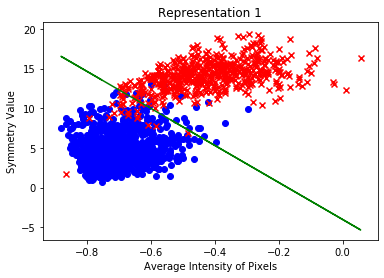

In [15]:
#we now use scatter to plot train data with decsion boundary
plt.scatter(subset1_train[:,0], subset1_train[:,1],marker='o',color='blue')
plt.scatter(subset2_train[:,0], subset2_train[:,1],marker='x',color='red')
plt.title('Representation 1')
plt.xlabel('Average Intensity of Pixels')
plt.ylabel('Symmetry Value')
y=array_train[:,1]
x=array_train[:,0]


plt.plot(x, -23.4*x -4.03,color='green')



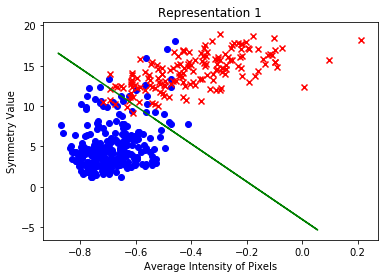

In [16]:
#we now use scatter to plot test data with decision boundary
plt.scatter(subset1_test[:,0], subset1_test[:,1],marker='o',color='blue')
plt.scatter(subset2_test[:,0], subset2_test[:,1],marker='x',color='red')
plt.title('Representation 1')
plt.xlabel('Average Intensity of Pixels')
plt.ylabel('Symmetry Value')
plt.plot(x, -23.4*x -4.03,color='green')
